In [578]:
import numpy as np   
import pandas as pd
import pandas_profiling as pp

In [579]:
import matplotlib.pyplot as plt
%matplotlib inline

In [580]:
train_data= pd.read_excel('Train.xlsx')
test_data= pd.read_excel('Test.xlsx')
train_data.head()

,EmployeeID,DOJ,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore,LeadershipPotentialScore
0,E11213,2016-04-24,184,sales,NaN,"Project_10,Project_4,Project_1",NaN,medium,0.834988,0.788830,56.29
1,E11214,2017-02-10,206,sales,NaN,"Project_7,Project_3,Project_2,Project_4",NaN,low,0.424764,0.575688,43.39
2,E11215,2016-03-14,249,sales,NaN,"Project_5,Project_10,Project_8",NaN,low,0.779043,0.845217,53.80
3,E11216,2015-04-22,140,sales,NaN,"Project_3,Project_2,Project_10,Project_6",NaN,medium,0.660020,0.589097,62.50
4,E11217,2016-04-24,121,sales,Yes,"Project_6,Project_9,Project_1",NaN,low,0.835571,0.625399,33.83


In [458]:
pp.ProfileReport(train_data)

Number of variables,11
Number of observations,11000
Total Missing (%),18.2%
Total size in memory,945.4 KiB
Average record size in memory,88.0 B
Numeric,4
Categorical,5
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [581]:
print(train_data.shape)
print(test_data.shape)

(11000, 11)
(3249, 10)


In [582]:
train_data.describe()

,HoursWorked_MthlyAvg,Promoted_InLast3Yrs,Self_appraisalScore,AppraisalRatingScore,LeadershipPotentialScore
count,11000.000000,234.0,10854.000000,9811.000000,11000.000000
mean,199.625545,1.0,0.623087,0.719810,54.381771
std,50.840524,0.0,0.250606,0.173482,13.813076
min,49.000000,1.0,0.040058,0.316175,16.180000
25%,155.000000,1.0,0.452268,0.566078,43.727500
50%,198.000000,1.0,0.655960,0.725892,54.480000
75%,244.000000,1.0,0.827729,0.873902,65.030000
max,310.000000,1.0,1.000000,1.000000,90.550000


In [583]:
test_data.describe()

,HoursWorked_MthlyAvg,Promoted_InLast3Yrs,Self_appraisalScore,AppraisalRatingScore
count,3249.000000,66.0,3214.000000,2906.000000
mean,200.372114,1.0,0.615244,0.713974
std,51.534397,0.0,0.249951,0.171589
min,49.000000,1.0,0.046094,0.338920
25%,154.000000,1.0,0.443166,0.556422
50%,200.000000,1.0,0.642393,0.721812
75%,245.000000,1.0,0.814436,0.864611
max,310.000000,1.0,1.000000,1.000000


In [584]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(train_data)

,Data Type,No of Levels,Levels
EmployeeID,object,11000,['E11213' 'E11214' 'E11215' ... 'E25456' 'E254...
DOJ,object,265,['2016-04-24' '2017-02-10' '2016-03-14' '2015-...
HoursWorked_MthlyAvg,int64,248,[184 206 249 140 121 269 147 188 253 258 151 2...
Department,object,13,['sales' 'support' 'engineering' 'IT' 'marketi...
HadGrievance,object,2,[nan 'Yes']
ProjectsWorkedOn,object,6114,"['Project_10,Project_4,Project_1'\n 'Project_7..."
Promoted_InLast3Yrs,float64,2,[nan 1.0]
Earnings_Level,object,3,['medium' 'low' 'high']
Self_appraisalScore,float64,10572,[0.83498761146 0.424764288455 0.779043096207 ....
AppraisalRatingScore,float64,9527,[0.788829841906 0.575687930548 0.845217472223 ...


In [586]:
inspect_data(test_data)

,Data Type,No of Levels,Levels
EmployeeID,object,3249,['E11211' 'E11212' 'E11218' ... 'E25447' 'E254...
DOJ,object,233,['2014-04-22' '2017-04-21' '2016-02-10' '2012-...
HoursWorked_MthlyAvg,int64,225,[221 232 150 215 191 290 276 231 109 308 147 2...
Department,object,13,['engineering' 'support' 'product' 'sales' 'ma...
HadGrievance,object,2,[nan 'Yes']
ProjectsWorkedOn,object,2354,"['Project_1,Project_2,Project_6,Project_3' 'Pr..."
Promoted_InLast3Yrs,float64,2,[nan 1.0]
Earnings_Level,object,3,['low' 'medium' 'high']
Self_appraisalScore,float64,3141,[0.829896195856 0.83454379486 0.796683395041 ....
AppraisalRatingScore,float64,2835,[0.932867640125 nan 0.644585844252 ... 0.98560...


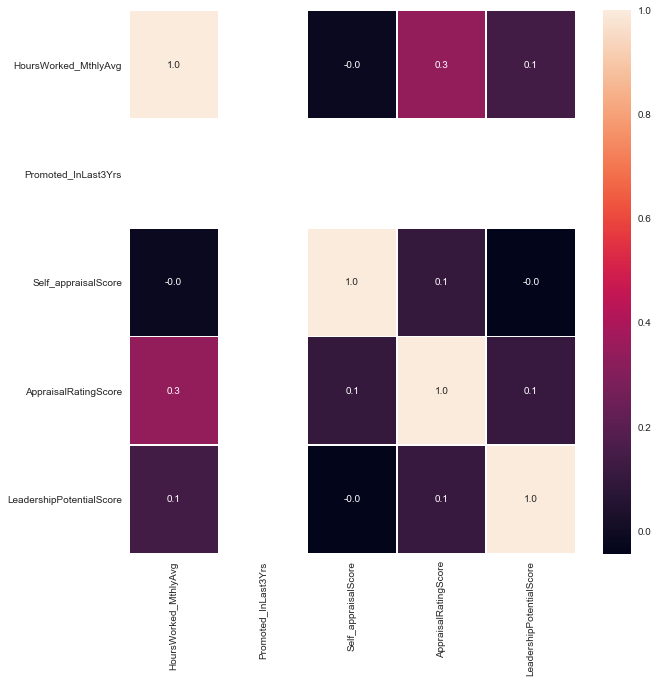

In [588]:
import seaborn as sns

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
           ]

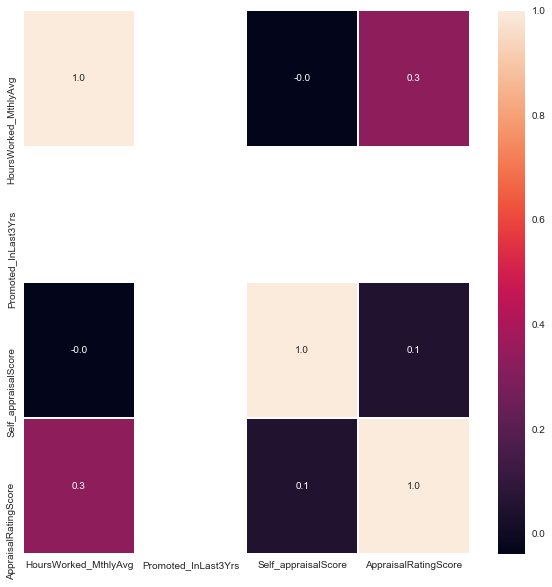

In [589]:
import seaborn as sns

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(test_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
           ]

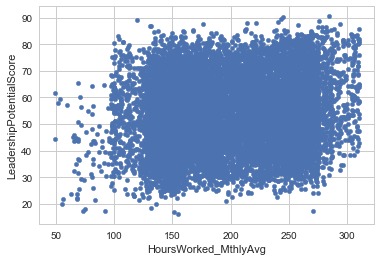

In [597]:
#Understanding the Relationship between Numerical veraibles and Target Variable¶
var = 'HoursWorked_MthlyAvg'
data = pd.concat([train_data['LeadershipPotentialScore'], train_data[var]],axis=1)
data.plot.scatter(x=var, y='LeadershipPotentialScore')

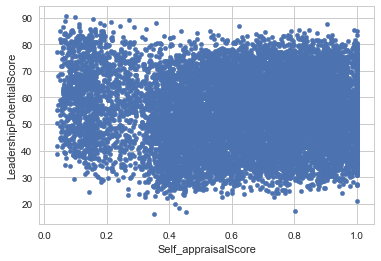

In [598]:
var = 'Self_appraisalScore'
data = pd.concat([train_data['LeadershipPotentialScore'], train_data[var]],axis=1)
data.plot.scatter(x=var, y='LeadershipPotentialScore')

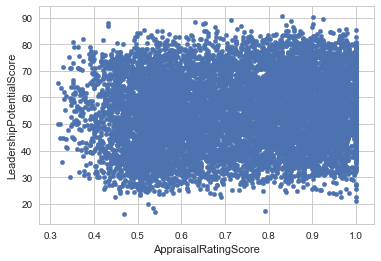

In [599]:
var = 'AppraisalRatingScore'
data = pd.concat([train_data['LeadershipPotentialScore'], train_data[var]],axis=1)
data.plot.scatter(x=var, y='LeadershipPotentialScore')

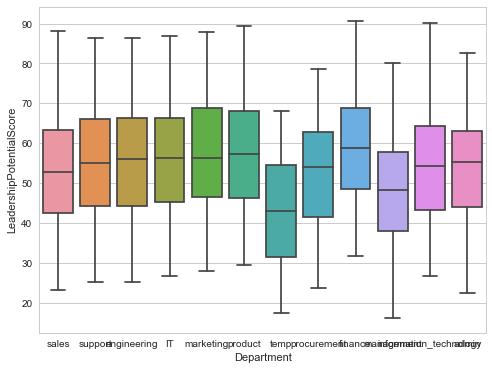

In [600]:
#Unnderstand the relation between Categorical Variables and Target Price¶
# Relatoinship with Caregorical Features
var = 'Department'
data = pd.concat([train_data['LeadershipPotentialScore'], train_data[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='LeadershipPotentialScore',data=data)

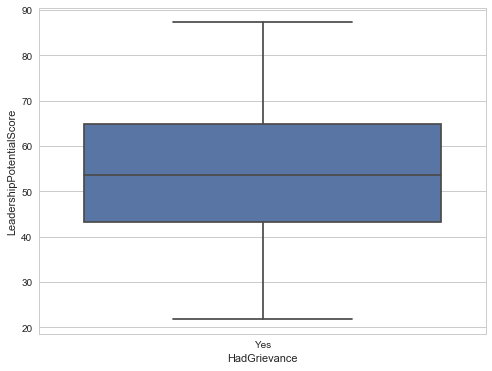

In [601]:
var = 'HadGrievance'
data = pd.concat([train_data['LeadershipPotentialScore'], train_data[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='LeadershipPotentialScore',data=data)

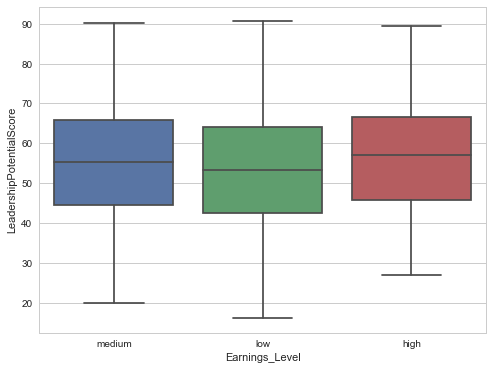

In [603]:
var = 'Earnings_Level'
data = pd.concat([train_data['LeadershipPotentialScore'], train_data[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='LeadershipPotentialScore',data=data)

In [604]:
train_data.drop(['EmployeeID'], axis=1, inplace=True) 

In [605]:
# converting 'DOJ' to datetime in train and test
train_data['DOJ'] = pd.to_datetime(train_data['DOJ'])

In [606]:
test_data['DOJ'] = pd.to_datetime(test_data['DOJ'])

In [607]:
train_data.dtypes

DOJ                         datetime64[ns]
HoursWorked_MthlyAvg                 int64
Department                          object
HadGrievance                        object
ProjectsWorkedOn                    object
Promoted_InLast3Yrs                float64
Earnings_Level                      object
Self_appraisalScore                float64
AppraisalRatingScore               float64
LeadershipPotentialScore           float64
dtype: object

In [608]:
# number of dates in 'DOJ' succeeding today's date
print(train_data['DOJ'][train_data['DOJ']> '2019-04-13'].count())
print(test_data['DOJ'][test_data['DOJ']> '2019-04-13'].count())

36
5


In [609]:
# subsetting past dates in train and test 
train_data= train_data[train_data['DOJ']<'2019-04-13']
train_data.shape

(10964, 10)

In [610]:
test_data= test_data[test_data['DOJ']<'2019-04-13']

In [611]:
train_data.isnull().sum(axis=0)

DOJ                             0
HoursWorked_MthlyAvg            0
Department                    551
HadGrievance                 9404
ProjectsWorkedOn                0
Promoted_InLast3Yrs         10730
Earnings_Level                  0
Self_appraisalScore           110
AppraisalRatingScore         1153
LeadershipPotentialScore        0
dtype: int64

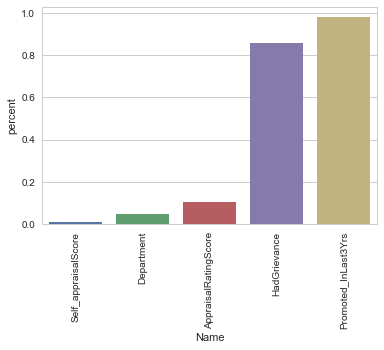

In [612]:
import seaborn as sns
#missing value percent in each of these columns in train
miss = train_data.isnull().sum()/len(train_data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

#visualising missing values
miss = miss.to_frame()
miss.columns = ['percent']
miss.index.names = ['Name']
miss['Name'] = miss.index
#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'percent', data=miss)
plt.xticks(rotation = 90)
plt.show()

In [613]:
test_data.isnull().sum()

EmployeeID                 0
DOJ                        0
HoursWorked_MthlyAvg       0
Department               158
HadGrievance            2757
ProjectsWorkedOn           0
Promoted_InLast3Yrs     3178
Earnings_Level             0
Self_appraisalScore       30
AppraisalRatingScore     338
dtype: int64

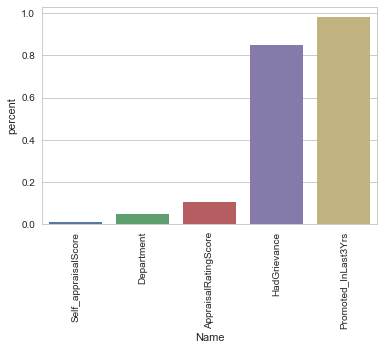

In [614]:
import seaborn as sns
#missing value percent in each of these columns in test
miss = test_data.isnull().sum()/len(test_data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

#visualising missing values
miss = miss.to_frame()
miss.columns = ['percent']
miss.index.names = ['Name']
miss['Name'] = miss.index
#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'percent', data=miss)
plt.xticks(rotation = 90)
plt.show()

In [615]:
# susetting 'Department' without null values in train and test
train_data= train_data[train_data['Department'].notnull()]

In [616]:
train_data.isnull().sum(axis=0)

DOJ                             0
HoursWorked_MthlyAvg            0
Department                      0
HadGrievance                 8924
ProjectsWorkedOn                0
Promoted_InLast3Yrs         10191
Earnings_Level                  0
Self_appraisalScore           110
AppraisalRatingScore         1101
LeadershipPotentialScore        0
dtype: int64

In [617]:
test_data= test_data[test_data['Department'].notnull()]

In [618]:
test_data.isnull().sum(axis=0)

EmployeeID                 0
DOJ                        0
HoursWorked_MthlyAvg       0
Department                 0
HadGrievance            2615
ProjectsWorkedOn           0
Promoted_InLast3Yrs     3023
Earnings_Level             0
Self_appraisalScore       30
AppraisalRatingScore     323
dtype: int64

In [619]:
print(train_data['HadGrievance'].value_counts())
print(train_data['Promoted_InLast3Yrs'].value_counts())

Yes    1489
Name: HadGrievance, dtype: int64
1.0    222
Name: Promoted_InLast3Yrs, dtype: int64


In [620]:
#imputation 
train_data['HadGrievance'].fillna(value='no',inplace=True)
train_data['Promoted_InLast3Yrs'].fillna(value='0',inplace=True)
test_data['HadGrievance'].fillna(value='no',inplace=True)
test_data['Promoted_InLast3Yrs'].fillna(value='0',inplace=True)

In [621]:
print(train_data['Department'].value_counts())


sales                     3037
engineering               1985
support                   1636
IT                         880
product                    644
marketing                  638
finance                    572
management                 463
information_technology     165
admin                      144
procurement                139
temp                       110
Name: Department, dtype: int64


In [622]:
train_data.isnull().sum(axis=0)

DOJ                            0
HoursWorked_MthlyAvg           0
Department                     0
HadGrievance                   0
ProjectsWorkedOn               0
Promoted_InLast3Yrs            0
Earnings_Level                 0
Self_appraisalScore          110
AppraisalRatingScore        1101
LeadershipPotentialScore       0
dtype: int64

In [623]:
test_data.isnull().sum(axis=0)

EmployeeID                0
DOJ                       0
HoursWorked_MthlyAvg      0
Department                0
HadGrievance              0
ProjectsWorkedOn          0
Promoted_InLast3Yrs       0
Earnings_Level            0
Self_appraisalScore      30
AppraisalRatingScore    323
dtype: int64

In [624]:
#converting 'Promoted_InLast3Yrs' from float to int
train_data['Promoted_InLast3Yrs'] = train_data['Promoted_InLast3Yrs'].astype(np.int16)
test_data['Promoted_InLast3Yrs'] = test_data['Promoted_InLast3Yrs'].astype(np.int16)

In [625]:
# decoupling the traget variable
y_train = train_data['LeadershipPotentialScore']
X_train =train_data.copy().drop('LeadershipPotentialScore', axis=1)
X_train.head()

,DOJ,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore
0,2016-04-24,184,sales,no,"Project_10,Project_4,Project_1",0,medium,0.834988,0.788830
1,2017-02-10,206,sales,no,"Project_7,Project_3,Project_2,Project_4",0,low,0.424764,0.575688
2,2016-03-14,249,sales,no,"Project_5,Project_10,Project_8",0,low,0.779043,0.845217
3,2015-04-22,140,sales,no,"Project_3,Project_2,Project_10,Project_6",0,medium,0.660020,0.589097
4,2016-04-24,121,sales,Yes,"Project_6,Project_9,Project_1",0,low,0.835571,0.625399


In [626]:
#spliting data to categorical and numerical
num_cols =X_train.select_dtypes(include='number').columns.tolist()
cat_cols =X_train.columns.difference(num_cols).tolist()
print(cat_cols)
print(num_cols)

['DOJ', 'Department', 'Earnings_Level', 'HadGrievance', 'ProjectsWorkedOn']
['HoursWorked_MthlyAvg', 'Promoted_InLast3Yrs', 'Self_appraisalScore', 'AppraisalRatingScore']


In [627]:
from sklearn.preprocessing import Imputer
mean_imputer= Imputer(strategy='mean')
mean_imputer.fit(X_train[num_cols])
X_train[num_cols] = mean_imputer.transform(X_train[num_cols])
test_data[num_cols] = mean_imputer.transform(test_data[num_cols])

In [628]:
X_train.isnull().sum(axis=0)

DOJ                     0
HoursWorked_MthlyAvg    0
Department              0
HadGrievance            0
ProjectsWorkedOn        0
Promoted_InLast3Yrs     0
Earnings_Level          0
Self_appraisalScore     0
AppraisalRatingScore    0
dtype: int64

In [629]:
test_data.isnull().sum(axis=0)

EmployeeID              0
DOJ                     0
HoursWorked_MthlyAvg    0
Department              0
HadGrievance            0
ProjectsWorkedOn        0
Promoted_InLast3Yrs     0
Earnings_Level          0
Self_appraisalScore     0
AppraisalRatingScore    0
dtype: int64

In [630]:
# creating an Experience col by subtracting 2 datetimes
from datetime import datetime
X_train['Experience'] = datetime.now() - X_train['DOJ']
X_train.head()

,DOJ,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore,Experience
0,2016-04-24,184.0,sales,no,"Project_10,Project_4,Project_1",0.0,medium,0.834988,0.788830,1085 days 02:41:36.646854
1,2017-02-10,206.0,sales,no,"Project_7,Project_3,Project_2,Project_4",0.0,low,0.424764,0.575688,793 days 02:41:36.646854
2,2016-03-14,249.0,sales,no,"Project_5,Project_10,Project_8",0.0,low,0.779043,0.845217,1126 days 02:41:36.646854
3,2015-04-22,140.0,sales,no,"Project_3,Project_2,Project_10,Project_6",0.0,medium,0.660020,0.589097,1453 days 02:41:36.646854
4,2016-04-24,121.0,sales,Yes,"Project_6,Project_9,Project_1",0.0,low,0.835571,0.625399,1085 days 02:41:36.646854


In [631]:
#droping DOJ
X_train.drop(['DOJ'], axis=1, inplace=True) 

In [632]:
X_train.head()

,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore,Experience
0,184.0,sales,no,"Project_10,Project_4,Project_1",0.0,medium,0.834988,0.788830,1085 days 02:41:36.646854
1,206.0,sales,no,"Project_7,Project_3,Project_2,Project_4",0.0,low,0.424764,0.575688,793 days 02:41:36.646854
2,249.0,sales,no,"Project_5,Project_10,Project_8",0.0,low,0.779043,0.845217,1126 days 02:41:36.646854
3,140.0,sales,no,"Project_3,Project_2,Project_10,Project_6",0.0,medium,0.660020,0.589097,1453 days 02:41:36.646854
4,121.0,sales,Yes,"Project_6,Project_9,Project_1",0.0,low,0.835571,0.625399,1085 days 02:41:36.646854


In [633]:
from datetime import datetime
test_data['Experience'] = datetime.now() - test_data['DOJ']
test_data.head()

,EmployeeID,DOJ,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore,Experience
0,E11211,2014-04-22,221.0,engineering,no,"Project_1,Project_2,Project_6,Project_3",0.0,low,0.829896,0.932868,1818 days 02:41:38.866197
1,E11212,2017-04-21,232.0,support,no,"Project_6,Project_1,Project_4",0.0,low,0.834544,0.719900,723 days 02:41:38.866197
2,E11218,2016-02-10,150.0,engineering,no,"Project_5,Project_3,Project_8,Project_1",0.0,low,0.796683,0.644586,1159 days 02:41:38.866197
3,E11219,2012-01-03,215.0,engineering,Yes,"Project_5,Project_2,Project_10",0.0,medium,0.715005,0.524114,2658 days 02:41:38.866197
4,E11223,2015-01-04,191.0,support,no,"Project_2,Project_5,Project_8,Project_6,Project_4",0.0,low,0.925337,0.946724,1561 days 02:41:38.866197


In [634]:
test_data.drop(['DOJ'], axis=1, inplace=True) 
test_data.head()

,EmployeeID,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore,Experience
0,E11211,221.0,engineering,no,"Project_1,Project_2,Project_6,Project_3",0.0,low,0.829896,0.932868,1818 days 02:41:38.866197
1,E11212,232.0,support,no,"Project_6,Project_1,Project_4",0.0,low,0.834544,0.719900,723 days 02:41:38.866197
2,E11218,150.0,engineering,no,"Project_5,Project_3,Project_8,Project_1",0.0,low,0.796683,0.644586,1159 days 02:41:38.866197
3,E11219,215.0,engineering,Yes,"Project_5,Project_2,Project_10",0.0,medium,0.715005,0.524114,2658 days 02:41:38.866197
4,E11223,191.0,support,no,"Project_2,Project_5,Project_8,Project_6,Project_4",0.0,low,0.925337,0.946724,1561 days 02:41:38.866197


In [635]:
X_train['Promoted_InLast3Yrs'].value_counts()

0.0    10191
1.0      222
Name: Promoted_InLast3Yrs, dtype: int64

In [636]:
# finding the count of ProjectsWorkedOn and assigning it to a new col
import re
sep = ","
X_train['NoOfProjects'] = X_train['ProjectsWorkedOn'].str.count(sep,re.I)+1
#X_train['Number of projects'] =np.count( X_train[X_train.ProjectsWorkedOn])
X_train.head()

,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore,Experience,NoOfProjects
0,184.0,sales,no,"Project_10,Project_4,Project_1",0.0,medium,0.834988,0.788830,1085 days 02:41:36.646854,3
1,206.0,sales,no,"Project_7,Project_3,Project_2,Project_4",0.0,low,0.424764,0.575688,793 days 02:41:36.646854,4
2,249.0,sales,no,"Project_5,Project_10,Project_8",0.0,low,0.779043,0.845217,1126 days 02:41:36.646854,3
3,140.0,sales,no,"Project_3,Project_2,Project_10,Project_6",0.0,medium,0.660020,0.589097,1453 days 02:41:36.646854,4
4,121.0,sales,Yes,"Project_6,Project_9,Project_1",0.0,low,0.835571,0.625399,1085 days 02:41:36.646854,3


In [637]:
test_data['NoOfProjects'] = test_data['ProjectsWorkedOn'].str.count(sep,re.I)+1
#X_train['Number of projects'] =np.count( X_train[X_train.ProjectsWorkedOn])
test_data.head()

,EmployeeID,HoursWorked_MthlyAvg,Department,HadGrievance,ProjectsWorkedOn,Promoted_InLast3Yrs,Earnings_Level,Self_appraisalScore,AppraisalRatingScore,Experience,NoOfProjects
0,E11211,221.0,engineering,no,"Project_1,Project_2,Project_6,Project_3",0.0,low,0.829896,0.932868,1818 days 02:41:38.866197,4
1,E11212,232.0,support,no,"Project_6,Project_1,Project_4",0.0,low,0.834544,0.719900,723 days 02:41:38.866197,3
2,E11218,150.0,engineering,no,"Project_5,Project_3,Project_8,Project_1",0.0,low,0.796683,0.644586,1159 days 02:41:38.866197,4
3,E11219,215.0,engineering,Yes,"Project_5,Project_2,Project_10",0.0,medium,0.715005,0.524114,2658 days 02:41:38.866197,3
4,E11223,191.0,support,no,"Project_2,Project_5,Project_8,Project_6,Project_4",0.0,low,0.925337,0.946724,1561 days 02:41:38.866197,5


In [638]:
test_data.shape
X_train.shape

(10413, 10)

In [639]:
# converting experience into int
X_train['Experience']= (X_train['Experience'] / np.timedelta64(1, 'D')).astype(int)

In [640]:
test_data['Experience']= (test_data['Experience'] / np.timedelta64(1, 'D')).astype(int)

In [641]:
X_train.dtypes

HoursWorked_MthlyAvg    float64
Department               object
HadGrievance             object
ProjectsWorkedOn         object
Promoted_InLast3Yrs     float64
Earnings_Level           object
Self_appraisalScore     float64
AppraisalRatingScore    float64
Experience                int32
NoOfProjects              int64
dtype: object

In [642]:
X_train.drop(['ProjectsWorkedOn'], axis=1, inplace=True) # Axis = 1 for columns
test_data.drop(['ProjectsWorkedOn'], axis=1, inplace=True) # Axis = 1 for columns


In [643]:
test_data1= test_data.drop(['EmployeeID'], axis=1)

In [646]:
# correlation between all numeric features
corr = train_data.corr()
print(corr['LeadershipPotentialScore'].sort_values(ascending=False))
#print(corr['LeadershipPotentialScore'].sort_values(ascending=False)[-5:])

LeadershipPotentialScore    1.000000
HoursWorked_MthlyAvg        0.134415
AppraisalRatingScore        0.113871
Promoted_InLast3Yrs        -0.009501
Self_appraisalScore        -0.040664
Name: LeadershipPotentialScore, dtype: float64


In [504]:
#dummification
X_train = pd.get_dummies(X_train)
test_data1 = pd.get_dummies(test_data1)

In [505]:
X_train.shape

(10413, 23)

In [506]:
test_data1.shape

(3086, 23)

In [507]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20)

In [508]:
# shape of train,test
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(8330, 23)
(2083, 23)
(8330,)
(2083,)


In [509]:
X_train.head()

,HoursWorked_MthlyAvg,Promoted_InLast3Yrs,Self_appraisalScore,AppraisalRatingScore,Experience,NoOfProjects,Department_IT,Department_admin,Department_engineering,Department_finance,...,Department_procurement,Department_product,Department_sales,Department_support,Department_temp,HadGrievance_Yes,HadGrievance_no,Earnings_Level_high,Earnings_Level_low,Earnings_Level_medium
9987,202.0,0.0,0.747906,0.592455,1193,4,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3164,149.0,0.0,0.456741,0.719900,1123,2,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5494,287.0,0.0,0.161699,0.882203,1490,7,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
752,210.0,0.0,0.624688,0.585891,1085,4,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2016,211.0,0.0,0.945521,0.853061,1084,4,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [510]:
# Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model_lr = lr.fit(X_train, y_train)

In [511]:
print ("R^2 is: \n", model_lr.score(X_train, y_train))
print ("R^2 is: \n", model_lr.score(X_valid, y_valid))

R^2 is: 
 0.1343600145411924
R^2 is: 
 0.14132171686126926


In [512]:
print('Intercept   :', lr.intercept_)
print('\n','*'*100)
print('Shape of Coefficients: \n', lr.coef_.shape)
print('\n','*'*100)
print('Coefficients: \n', lr.coef_)

Intercept   : 39.58281365458829

 ****************************************************************************************************
Shape of Coefficients: 
 (23,)

 ****************************************************************************************************
Coefficients: 
 [-4.56373196e-03 -5.06028744e-01  9.14449863e-01  1.25064903e+00
  2.19455282e-03  3.11934395e+00  2.03234180e+00 -6.25020253e-01
  8.83938290e-01  4.17889951e+00  6.63720531e-01 -8.06635152e+00
  3.54353347e+00 -2.13373959e+00  2.91634632e+00 -1.09723068e+00
  9.22170379e-01 -3.21860825e+00 -3.16937253e-01  3.16937253e-01
  2.16849644e+00 -2.03038218e+00 -1.38114261e-01]


In [513]:
pred_train =model_lr.predict(X_train)
pred_valid = model_lr.predict(X_valid)

In [514]:
#evaluatin the linear model in train
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_train, pred_train))

MAPE: 22.193079007999298


In [515]:
#evaluatin the linear model in validation data

def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid, pred_valid))

MAPE: 22.532804370423616


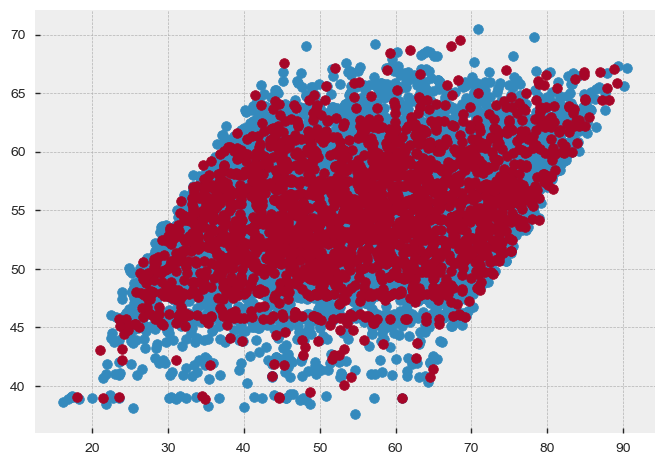

In [516]:
from matplotlib import style
style.use("bmh")
plt.scatter(y_train,pred_train)
plt.scatter(y_valid,pred_valid)
plt.show()

In [520]:
# decision trees
from sklearn import tree
dt1 = tree.DecisionTreeRegressor()   ## Instantiating DecisionTree-Regressor
dt1.fit(X_train, y_train)        

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [521]:
print('R^2 train =',dt1.score(X_train, y_train))
print('R^2 valid =',dt1.score(X_valid, y_valid))

R^2 train = 1.0
R^2 valid = -0.8051632199022569


In [522]:
# with tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
dt = tree.DecisionTreeRegressor() 
param_grid = {'criterion': ['mse','mae'], 'max_leaf_nodes': np.arange(5,30,1),
             'min_samples_split': np.arange(2,10,1),
             'max_depth':np.arange(3,15,1),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}
rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=50)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)
print('R^2 valid',rsearch.score(X_valid, y_valid))

0.09247914731124947
DecisionTreeRegressor(criterion='mse', max_depth=14, max_features=None,
           max_leaf_nodes=22, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=6, min_weight_fraction_leaf=0.015,
           presort=False, random_state=None, splitter='best')
R^2 valid 0.10146235572663109


In [523]:
preds= rsearch.predict(X_train)

In [524]:
preds_valid= rsearch.predict(X_valid)

In [525]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid, preds_valid))

MAPE: 22.8279695909672


In [526]:
from sklearn.linear_model import Lasso
lm_lasso = Lasso()
lasso_fit = lm_lasso.fit(X_train,y_train)
pred_lasso_values = lasso_fit.predict(X_valid)

In [527]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid, pred_lasso_values))

MAPE: 23.061039227159615


In [528]:
from sklearn.linear_model import Ridge
lm_ridge = Ridge()
ridge_fit = lm_ridge.fit(X_train,y_train)
pred_ridge_values = ridge_fit.predict(X_valid)

In [529]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid, pred_ridge_values))

MAPE: 22.532908468804305


In [530]:
from sklearn.linear_model import ElasticNet
lm_elastic = ElasticNet()
elastic_fit = lm_elastic.fit(X_train,y_train)
pred_elastic_values = elastic_fit.predict(X_valid)

In [531]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid, pred_elastic_values))

MAPE: 23.1412708525347


In [532]:
from sklearn.ensemble import RandomForestRegressor
# Model initilization
rfc_50 = RandomForestRegressor(n_estimators=50, max_depth=22, oob_score=True)
# Model training
rfc_50.fit(X = X_train,y = y_train)
# Model predictions
rfc50_train_pred = rfc_50.predict(X_train)
rfc50_test_pred = rfc_50.predict(X_valid)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [533]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid,rfc50_test_pred))

MAPE: 22.934721373622697


In [534]:
from sklearn.model_selection import RandomizedSearchCV
rfc_grid = RandomForestRegressor(n_jobs=-1, max_features='sqrt')
param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=10)
rfc_cv_grid.fit(X_train, y_train)
rfc_cv_grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [537]:
rf_pred = rfc_cv_grid.predict(X_valid)
test_pred=rfc_cv_grid.predict(test_data1)

In [573]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid,rf_pred))

MAPE: 22.70419295832588


In [538]:
final= pd.DataFrame({'EmployeeID': test_data['EmployeeID'], 'preds': test_pred})

In [539]:
final.to_csv('final.csv',index=False)

In [571]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosted = GradientBoostingRegressor()
gradient_fit =gradient_boosted.fit(X_train, y_train)

In [572]:
pred_GBM= gradient_fit.predict(X_valid)

In [574]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid,pred_GBM))

MAPE: 22.66458481181841


In [575]:
#Model Build using XGB
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb_fit = xgb.fit(X_train, y_train)

C:\Users\Tejasvi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [576]:
xgb_pred = xgb_fit.predict(X_valid)

In [577]:
def mean_absolute_percentage_error(y_test, linpred): 
    y_test, linpred = np.array(y_test), np.array(linpred)

    return np.mean(np.abs((y_test- linpred) / y_test)) * 100

from sklearn import metrics
print('MAPE:',mean_absolute_percentage_error(y_valid,xgb_pred))

MAPE: 22.662119362338835
